In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 

In [2]:
print(pd.__version__)
print(np.__version__)

0.23.4
1.15.4


In [3]:
from sklearn import datasets
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

In [4]:
#intip.in/datasetworkshopub

iris_csv = pd.read_csv('../dataset/iris.csv')
print(iris_csv.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [30]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
poly = svm.SVC(kernel='poly', degree=3, C=10)
poly.fit(X,y)
print(poly.score(X_test, y_test))

0.9


/home/svmihar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
rbf = svm.SVC(kernel='rbf', gamma=0.1, C=5000)
rbf.fit(X,y)

print(poly.score(X_test, y_test))

0.8666666666666667


In [19]:
from sklearn.svm import LinearSVC 
model_svm = LinearSVC(C=10)
model_svm.fit(X_train,y_train)
print(model_svm.score(X_test, y_test))

0.7333333333333333


/home/svmihar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:
def make_meshgrid(x,y,h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

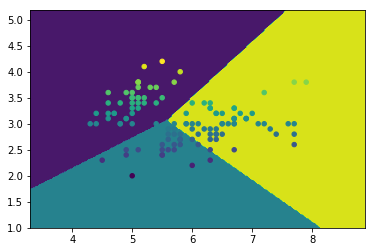

In [22]:
fig, ax = plt.subplots()
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax,model_svm, xx, yy, cmap='viridis')
ax.scatter(X0, X1, c=X1, cmap='viridis',s=20)

/home/svmihar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/svmihar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7666666666666667
0.7333333333333333
0.7333333333333333


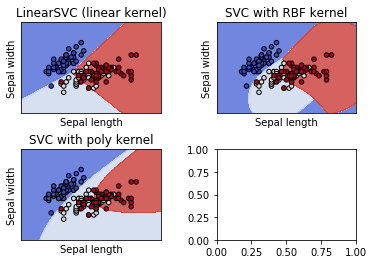

In [25]:
from sklearn import svm 

estimator = svm.SVC(C=10, gamma=0.1,kernel='rbf')
estimator.fit(X_train, y_train)

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
C=20
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
models = (
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=10),
        svm.SVC(kernel='poly', degree=3, C=10))
titles = (
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
            'SVC with poly kernel')
models = (clf.fit(X, y) for clf in models)
models_error = (clf.score(X_test, y_test) for clf in  models)
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    print(clf.score(X_test, y_test))



In [12]:
poly = svm.SVC(kernel='poly', degree=3, C=10)
poly.fit(X,y)
print(poly.score(X_test, y_test))

0.7666666666666667


/home/svmihar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


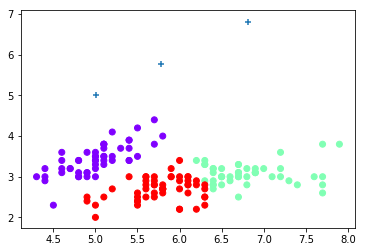

In [33]:
from sklearn.cluster import KMeans 

model_kmeans = KMeans(n_clusters=3)
label = model_kmeans.fit(X).predict(X)
center = model_kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=label, cmap='rainbow')
plt.scatter(center[:,0], center[:,0], marker='+')